In [1]:
from algorithm_ranking import MeasurementsSimulator, MeasurementsVisualizer, RankVariantsDFGTr, RankVariantsSort2

In [2]:
import pandas as pd
import numpy as np

In [3]:
cfg = {}
cfg['t0']  = [0.22,0.01] #[mean, std]
cfg['t1']  = [0.2,0.025]
cfg['t2']  = [0.18,0.01]
cfg['t3']  = [0.221,0.003]
cfg['t4']  = [0.30,0.02] #[mean, std]
cfg['t5']  = [0.31,0.01]
cfg['t6']  = [0.29,0.025]
cfg['t7']  = [0.30,0.01]
h0 = list(cfg.keys())

In [4]:
ms = MeasurementsSimulator(cfg, 'normal',seed=159) 
ms.measure(15,1)

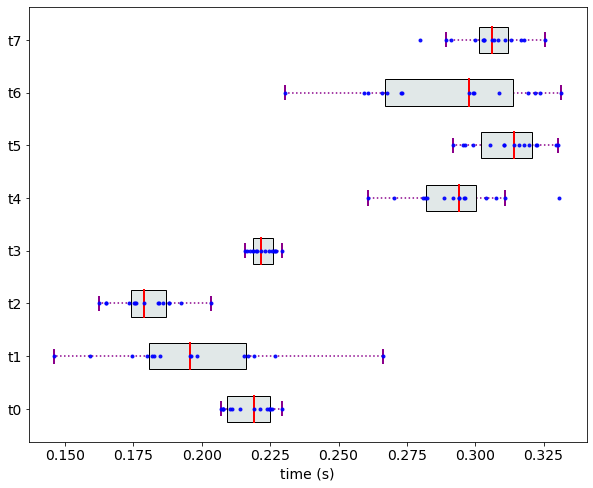

In [5]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(tick_size=14,scale=1.0)

In [6]:
#fig.savefig("vagueness.pdf", format="pdf", bbox_inches="tight")

In [7]:
rv = RankVariantsDFGTr(ms.get_alg_measurements(), h0)

In [8]:
rv.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t1,0
1,t2,0
2,t0,1
3,t3,1
4,t4,2
5,t6,2
6,t5,3
7,t7,3


In [9]:
rv.graph.get_separable_arrangement()

['t2', 't1', 't0', 't3', 't4', 't6', 't5', 't7']

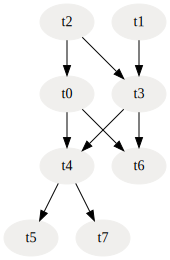

In [10]:
#rv.graph.transitivity_reduction()
rv.graph.visualize()

In [11]:
#1) 1st alg No connections to last alg
#2) Order in terms of decreasing outgoing edges

In [12]:
h0_ = []
for rank in range(rv.graph.graph_depth + 1):
    algs_sorted = []
    num_in_nodes = []
    num_out_nodes = []
    for alg in rv.graph.get_nodes_at_depth(rank):
        algs_sorted.append(alg)
        num_in_nodes.append(len(rv.graph.nodes[alg].in_nodes))
        num_out_nodes.append(len(rv.graph.nodes[alg].out_nodes))
    df = pd.DataFrame(list(zip(algs_sorted, num_in_nodes, num_out_nodes)))
    h0_ = h0_ + list(df.sort_values([1,2],ascending=[True,False])[0])
h0_

['t2', 't1', 't0', 't3', 't4', 't6', 't5', 't7']

In [13]:
t = ['a','b','c','d']
in_n = [1,0,1,0]
out_n = [3,1,4,2]
dfx = pd.DataFrame(list(zip(t,in_n,out_n)))
dfx

,0,1,2
0,a,1,3
1,b,0,1
2,c,1,4
3,d,0,2


In [14]:
list(dfx.sort_values([1,2],ascending=[True,False])[0])

['d', 'b', 'c', 'a']

In [15]:
h0_ = ['t2','t1','t0','t3','t4','t6','t5','t7']

In [16]:
rv2 = RankVariantsSort2(ms.get_alg_measurements(), h0_)

In [17]:
rv2.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t2,0
1,t1,0
2,t0,0
3,t3,0
4,t4,1
5,t6,1
6,t5,1
7,t7,1


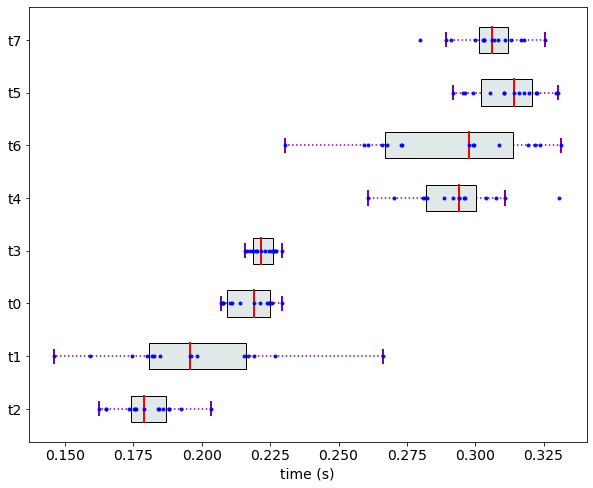

In [18]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0_)
fig = mv.show_measurements_boxplots(tick_size=14,scale=1.0)